# Base Models

This notebook trains and tests 4 models (Random Forest, XGBoost, LightGBM, CatBoost) on the following datasets / scenarios:
1. Original 135-feature dataset
2. 135-feature w StandardScaler / MinMaxScaler
3. 135-feature w SMOTE
4. Hyperparameter tuning for CatBoost (135-feature) and LGBM (135-feature w MinMax)
5. 138-feature for CatBoost and hyperparameter tuning

# Import Libraries

In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from matplotlib import pyplot as plt

# Read Data
To read the data without error, files should be organised in the following structure:
```
DSA4262
|-- data
|  |-- train_all_features.parquet
|  |-- test_all_features.parquet
|  |__ ...
|-- base_models.ipynb
|__ ...
```

In [2]:
train = pd.read_parquet('./data/train_all_features.parquet')
test = pd.read_parquet('./data/test_all_features.parquet')

In [3]:
print(len(train))
print(len(test))

96821
25017


In [4]:
x_train = train.drop(columns=["transcript_id", "transcript_position", "seq", "gene_id", "label"])
y_train = train[['label']]

In [5]:
x_test = test.drop(columns=["transcript_id", "transcript_position", "seq", "gene_id", "label"])
y_test = test[['label']]

In [6]:
print(x_train)
print(y_train)

        whole_mean_dt_1  whole_mean_sd_1  whole_mean_curr_1  whole_mean_dt_2  \
18             0.007340         2.977180         108.360000         0.007782   
19             0.008988         3.961489         118.638298         0.007403   
20             0.011065         7.299608         115.549020         0.009377   
21             0.006904         2.803571         119.142857         0.010334   
22             0.006961         4.949231         108.373077         0.009155   
...                 ...              ...                ...              ...   
121833         0.009594         3.294164         118.232877         0.007300   
121834         0.008393         4.511014         110.969565         0.010305   
121835         0.008161         3.918438         113.968750         0.006877   
121836         0.008044         3.191228         109.354386         0.007419   
121837         0.008788         4.090577         105.807692         0.006907   

        whole_mean_sd_2  whole_mean_cur

# 1. Original 135-Feature Dataset

## Logistic Regression

In [7]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print(f'confusion matrix:\n {confusion_matrix(y_test, lr.predict(x_test))}')
roc_score = roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23941    22]
 [ 1027    27]]
roc auc: 0.7867
pr auc: 0.209
avg score: 0.4979


## Decision Tree

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
print(f'confusion matrix:\n {confusion_matrix(y_test, dt.predict(x_test))}')
roc_score = roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, dt.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23031   932]
 [  738   316]]
roc auc: 0.6305
pr auc: 0.2913
avg score: 0.4609


## Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [14]:
print(f'confusion matrix:\n {confusion_matrix(y_test, rf.predict(x_test))}')
roc_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23895    68]
 [  900   154]]
roc auc: 0.8934
pr auc: 0.4388
avg score: 0.6661


## XGBoost

In [15]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
print(f'confusion matrix:\n {confusion_matrix(y_test, xgb.predict(x_test))}')
roc_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, xgb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23758   205]
 [  745   309]]
roc auc: 0.9093
pr auc: 0.4306
avg score: 0.6699


## LightGBM

In [17]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train.values.ravel())

[LightGBM] [Info] Number of positive: 4421, number of negative: 92400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33332
[LightGBM] [Info] Number of data points in the train set: 96821, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045662 -> initscore=-3.039761
[LightGBM] [Info] Start training from score -3.039761


LGBMClassifier()

In [18]:
print(f'confusion matrix:\n {confusion_matrix(y_test, lgbm.predict(x_test))}')
roc_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, lgbm.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23793   170]
 [  742   312]]
roc auc: 0.9194
pr auc: 0.4653
avg score: 0.6924


## CatBoost

In [19]:
cb = CatBoostClassifier()
cb.fit(x_train, y_train)

Learning rate set to 0.072601
0:	learn: 0.5972806	total: 76.6ms	remaining: 1m 16s
1:	learn: 0.5101525	total: 91.7ms	remaining: 45.7s
2:	learn: 0.4475773	total: 105ms	remaining: 34.9s
3:	learn: 0.3920563	total: 121ms	remaining: 30s
4:	learn: 0.3529952	total: 134ms	remaining: 26.7s
5:	learn: 0.3183178	total: 179ms	remaining: 29.7s
6:	learn: 0.2880504	total: 204ms	remaining: 29s
7:	learn: 0.2664627	total: 221ms	remaining: 27.5s
8:	learn: 0.2464726	total: 238ms	remaining: 26.2s
9:	learn: 0.2292336	total: 255ms	remaining: 25.3s
10:	learn: 0.2142997	total: 271ms	remaining: 24.4s
11:	learn: 0.2037527	total: 286ms	remaining: 23.6s
12:	learn: 0.1946352	total: 303ms	remaining: 23s
13:	learn: 0.1874209	total: 322ms	remaining: 22.7s
14:	learn: 0.1800045	total: 343ms	remaining: 22.5s
15:	learn: 0.1737979	total: 359ms	remaining: 22.1s
16:	learn: 0.1694930	total: 374ms	remaining: 21.6s
17:	learn: 0.1655659	total: 390ms	remaining: 21.3s
18:	learn: 0.1624088	total: 405ms	remaining: 20.9s
19:	learn: 0.1

In [20]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23767   196]
 [  742   312]]
roc auc: 0.9251
pr auc: 0.4855
avg score: 0.7053


# 2. 135-Feature w Scaling
Select StandardScaler / MinMaxScaler accordingly in the cell below

In [32]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [33]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Random Forest

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [35]:
print(f'confusion matrix:\n {confusion_matrix(y_test, rf.predict(x_test_scaled))}')
roc_score = roc_auc_score(y_test, rf.predict_proba(x_test_scaled)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(x_test_scaled)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23896    67]
 [  893   161]]
roc auc: 0.8951
pr auc: 0.4457
avg score: 0.6704


## XGBoost

In [36]:
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
print(f'confusion matrix:\n {confusion_matrix(y_test, xgb.predict(x_test_scaled))}')
roc_score = roc_auc_score(y_test, xgb.predict_proba(x_test_scaled)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, xgb.predict_proba(x_test_scaled)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23755   208]
 [  729   325]]
roc auc: 0.9096
pr auc: 0.4391
avg score: 0.6744


## LightGBM

In [38]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_scaled, y_train)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4421, number of negative: 92400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33348
[LightGBM] [Info] Number of data points in the train set: 96821, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045662 -> initscore=-3.039761
[LightGBM] [Info] Start training from score -3.039761


LGBMClassifier()

In [39]:
print(f'confusion matrix:\n {confusion_matrix(y_test, lgbm.predict(x_test_scaled))}')
roc_score = roc_auc_score(y_test, lgbm.predict_proba(x_test_scaled)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, lgbm.predict_proba(x_test_scaled)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23776   187]
 [  733   321]]
roc auc: 0.9197
pr auc: 0.4614
avg score: 0.6906


## CatBoost

In [40]:
cb = CatBoostClassifier()
cb.fit(x_train_scaled, y_train)

Learning rate set to 0.072601
0:	learn: 0.5972806	total: 17.3ms	remaining: 17.2s
1:	learn: 0.5101525	total: 30.8ms	remaining: 15.4s
2:	learn: 0.4475773	total: 44.1ms	remaining: 14.7s
3:	learn: 0.3920563	total: 59.5ms	remaining: 14.8s
4:	learn: 0.3529952	total: 72.4ms	remaining: 14.4s
5:	learn: 0.3183178	total: 87.3ms	remaining: 14.5s
6:	learn: 0.2880504	total: 101ms	remaining: 14.3s
7:	learn: 0.2664627	total: 115ms	remaining: 14.3s
8:	learn: 0.2464726	total: 129ms	remaining: 14.2s
9:	learn: 0.2292336	total: 144ms	remaining: 14.2s
10:	learn: 0.2142997	total: 159ms	remaining: 14.3s
11:	learn: 0.2037527	total: 174ms	remaining: 14.3s
12:	learn: 0.1946352	total: 192ms	remaining: 14.6s
13:	learn: 0.1874209	total: 208ms	remaining: 14.7s
14:	learn: 0.1800045	total: 224ms	remaining: 14.7s
15:	learn: 0.1737979	total: 238ms	remaining: 14.6s
16:	learn: 0.1694930	total: 252ms	remaining: 14.6s
17:	learn: 0.1655659	total: 267ms	remaining: 14.6s
18:	learn: 0.1624088	total: 282ms	remaining: 14.6s
19:	l

In [41]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test_scaled))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test_scaled)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test_scaled)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23781   182]
 [  736   318]]
roc auc: 0.9258
pr auc: 0.4866
avg score: 0.7062


# 3. 135-Feature w Oversampling
SMOTE used to oversample the minority class (i.e. class 1)

In [42]:
Counter(y_train.label)

Counter({0: 92400, 1: 4421})

In [43]:
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [44]:
Counter(y_train_sm.label)

Counter({0: 92400, 1: 92400})

## Random Forest

In [45]:
rf = RandomForestClassifier()
rf.fit(x_train_sm, y_train_sm)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [46]:
print(f'confusion matrix:\n {confusion_matrix(y_test, rf.predict(x_test))}')
roc_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23483   480]
 [  586   468]]
roc auc: 0.916
pr auc: 0.4355
avg score: 0.6758


## XGBoost

In [47]:
xgb = XGBClassifier()
xgb.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
print(f'confusion matrix:\n {confusion_matrix(y_test, xgb.predict(x_test))}')
roc_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, xgb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23546   417]
 [  693   361]]
roc auc: 0.895
pr auc: 0.3603
avg score: 0.6277


## LightGBM

In [49]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_sm, y_train_sm)

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 92400, number of negative: 92400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34425
[LightGBM] [Info] Number of data points in the train set: 184800, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [50]:
print(f'confusion matrix:\n {confusion_matrix(y_test, lgbm.predict(x_test))}')
roc_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, lgbm.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23529   434]
 [  748   306]]
roc auc: 0.8879
pr auc: 0.3193
avg score: 0.6036


## CatBoost

In [51]:
cb = CatBoostClassifier()
cb.fit(x_train_sm, y_train_sm)

Learning rate set to 0.095679
0:	learn: 0.6519339	total: 25.5ms	remaining: 25.4s
1:	learn: 0.6207102	total: 48.6ms	remaining: 24.3s
2:	learn: 0.5938872	total: 68.3ms	remaining: 22.7s
3:	learn: 0.5686595	total: 88.7ms	remaining: 22.1s
4:	learn: 0.5481164	total: 109ms	remaining: 21.7s
5:	learn: 0.5247729	total: 127ms	remaining: 21.1s
6:	learn: 0.5072558	total: 149ms	remaining: 21.1s
7:	learn: 0.4934566	total: 170ms	remaining: 21.1s
8:	learn: 0.4828842	total: 191ms	remaining: 21s
9:	learn: 0.4677515	total: 215ms	remaining: 21.3s
10:	learn: 0.4551779	total: 239ms	remaining: 21.5s
11:	learn: 0.4337131	total: 261ms	remaining: 21.5s
12:	learn: 0.4238968	total: 282ms	remaining: 21.4s
13:	learn: 0.4101111	total: 301ms	remaining: 21.2s
14:	learn: 0.3971869	total: 324ms	remaining: 21.3s
15:	learn: 0.3885035	total: 344ms	remaining: 21.1s
16:	learn: 0.3767620	total: 362ms	remaining: 20.9s
17:	learn: 0.3694287	total: 383ms	remaining: 20.9s
18:	learn: 0.3602673	total: 405ms	remaining: 20.9s
19:	learn

In [52]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23654   309]
 [  703   351]]
roc auc: 0.9079
pr auc: 0.4195
avg score: 0.6637


# 4. Hyperparameter Tuning
Hyperparameter tuning is run using RandomSearchCV instead of GridSearchCV to reduce runtime. Only conducted for the 2 models with the best performance in the above scenarios, CatBoost on original 135-feature dataset and LGBM on dataset w MinMaxScaler.

## CatBoost (Original 135-Feature)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
import numpy as np

catboost_model = CatBoostClassifier(silent=True)

# Define the hyperparameter distribution
param_dist = {
    'depth': np.arange(4, 10),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'iterations': np.arange(100, 1000, 100)
}

# Custom scoring function that sums the roc_auc and pr_auc
def combined_auc_score(y_true, y_proba):
    roc_auc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    return (roc_auc + pr_auc)/2

# Create a custom scorer using make_scorer, with needs_proba=True since we need predicted probabilities
combined_scorer = make_scorer(combined_auc_score, needs_proba=True)

# Set up RandomizedSearchCV with the custom combined scorer
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_dist, 
    n_iter=50,
    scoring=combined_scorer, 
    cv=5, 
    random_state=42,
    verbose = 3
)

# Perform the random search
random_search.fit(x_train, y_train)

# Output the best parameters based on the combined auc score
print(f"Best parameters found (based on combined AUC score): {random_search.best_params_}")
print(f"Best combined AUC score (roc_auc + pr_auc): {random_search.best_score_}")

cb = random_search.best_estimator_

In [ ]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

## LightGBM (135-Feature w MinMaxScaler)

In [57]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train = y_train.values.ravel()

In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
import numpy as np

lgb_model = LGBMClassifier()

# Define the hyperparameter distribution
param_dist = {
    'num_leaves': np.arange(10, 100, 10),
    'min_data_in_leaf': np.arange(100, 1000, 100),
    'max_depth': [-1, 10, 20],
    'verbose': [-1]
}

# Custom scoring function that sums the roc_auc and pr_auc
def combined_auc_score(y_true, y_proba):
    roc_auc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    return (roc_auc + pr_auc)/2

# Create a custom scorer using make_scorer, with needs_proba=True since we need predicted probabilities
combined_scorer = make_scorer(combined_auc_score, needs_proba=True)

# Set up RandomizedSearchCV with the custom combined scorer
random_search = RandomizedSearchCV(
    estimator=lgb_model, 
    param_distributions=param_dist, 
    n_iter=50,
    scoring=combined_scorer, 
    cv=5, 
    random_state=42,
    verbose = 3
)

# Perform the random search
random_search.fit(x_train_scaled, y_train)

# Output the best parameters based on the combined auc score
print(f"Best parameters found (based on combined AUC score): {random_search.best_params_}")
print(f"Best combined AUC score (roc_auc + pr_auc): {random_search.best_score_}")

lgbm = random_search.best_estimator_

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=-1, min_data_in_leaf=300, num_leaves=70, verbose=-1;, score=0.698 total time=   2.1s
[CV 2/5] END max_depth=-1, min_data_in_leaf=300, num_leaves=70, verbose=-1;, score=0.682 total time=   1.9s
[CV 3/5] END max_depth=-1, min_data_in_leaf=300, num_leaves=70, verbose=-1;, score=0.670 total time=   2.0s
[CV 4/5] END max_depth=-1, min_data_in_leaf=300, num_leaves=70, verbose=-1;, score=0.687 total time=   1.9s
[CV 5/5] END max_depth=-1, min_data_in_leaf=300, num_leaves=70, verbose=-1;, score=0.680 total time=   1.9s
[CV 1/5] END max_depth=-1, min_data_in_leaf=100, num_leaves=70, verbose=-1;, score=0.696 total time=   1.9s
[CV 2/5] END max_depth=-1, min_data_in_leaf=100, num_leaves=70, verbose=-1;, score=0.682 total time=   1.8s
[CV 3/5] END max_depth=-1, min_data_in_leaf=100, num_leaves=70, verbose=-1;, score=0.668 total time=   1.8s
[CV 4/5] END max_depth=-1, min_data_in_leaf=100, num_leaves=70, verbose=-1

/Users/leeeda/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found (based on combined AUC score): {'verbose': -1, 'num_leaves': 40, 'min_data_in_leaf': 800, 'max_depth': -1}
Best combined AUC score (roc_auc + pr_auc): 0.6874810610831779


In [62]:
print(f'confusion matrix:\n {confusion_matrix(y_test, lgbm.predict(x_test_scaled))}')
roc_score = roc_auc_score(y_test, lgbm.predict_proba(x_test_scaled)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, lgbm.predict_proba(x_test_scaled)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23764   199]
 [  724   330]]
roc auc: 0.9224
pr auc: 0.4749
avg score: 0.6986


# 5. 138-Feature Dataset

## Data Processing

In [63]:
train = pd.read_parquet('./data/train_all_features.parquet')
test = pd.read_parquet('./data/test_all_features.parquet')

In [64]:
## Additional 5-mer features for train set
train["seq_1"] = train["seq"].apply(lambda x: x[0:5])
train["seq_2"] = train["seq"].apply(lambda x: x[1:6])
train["seq_3"] = train["seq"].apply(lambda x: x[2:7])

In [65]:
## Additional 5-mer features for test set
test["seq_1"] = test["seq"].apply(lambda x: x[0:5])
test["seq_2"] = test["seq"].apply(lambda x: x[1:6])
test["seq_3"] = test["seq"].apply(lambda x: x[2:7])

In [66]:
x_train = train.drop(columns=["transcript_id", "transcript_position", "seq", "gene_id", "label"])
y_train = train[['label']]

In [67]:
x_test = test.drop(columns=["transcript_id", "transcript_position", "seq", "gene_id", "label"])
y_test = test[['label']]

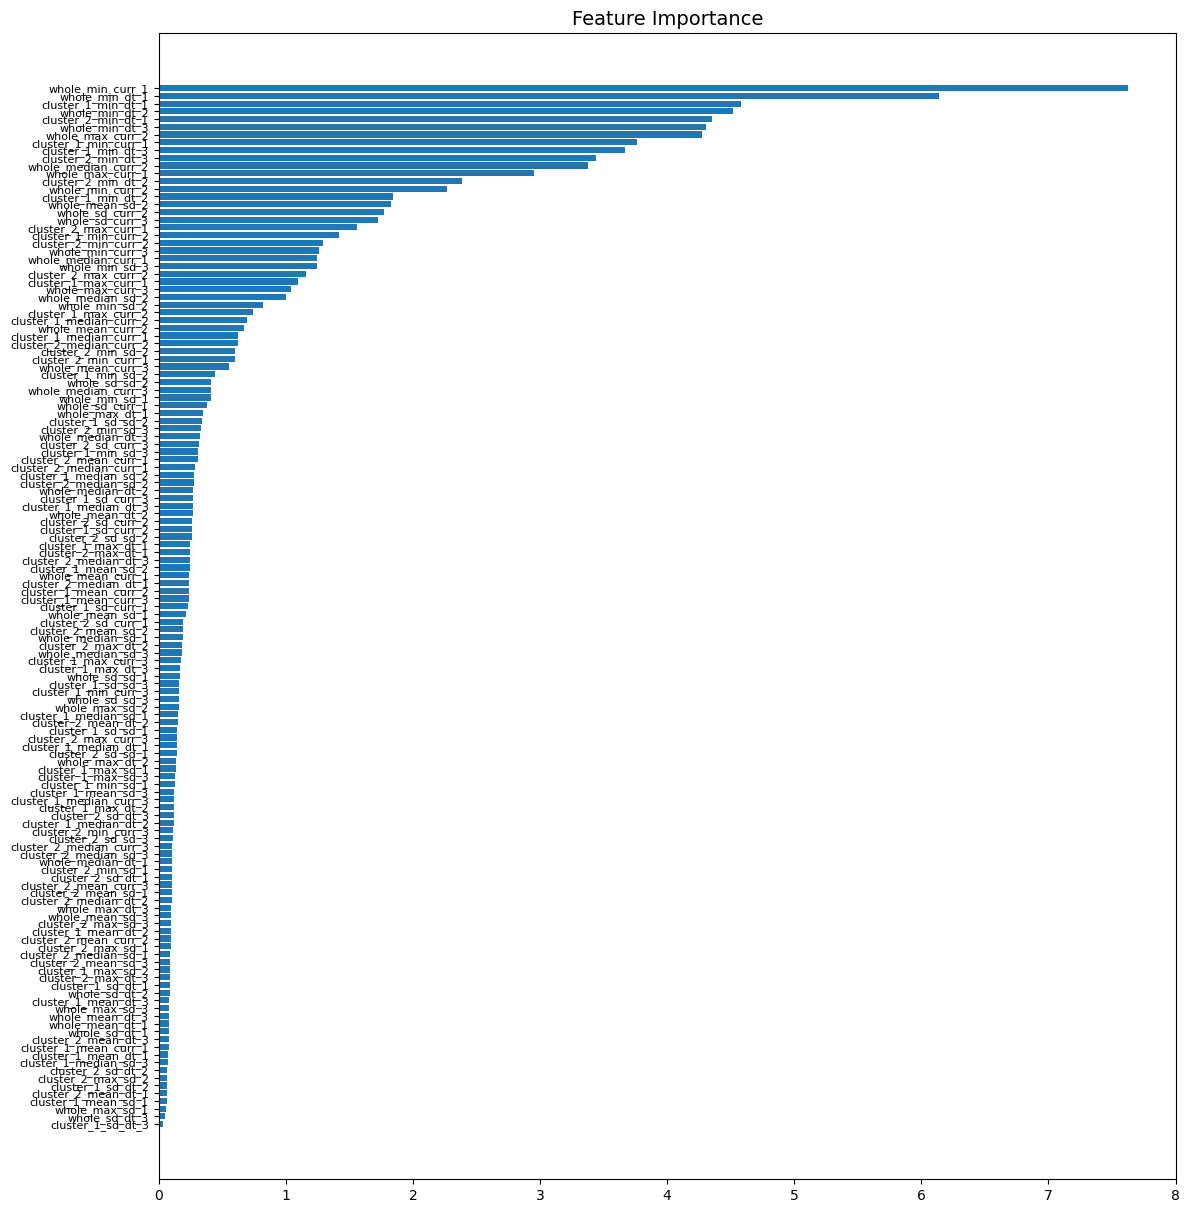

In [72]:
## Plot feature importance
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))  # Increase figure size for more space
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx], fontsize=8)
plt.tight_layout()
plt.title('Feature Importance', fontsize=14)
plt.savefig('feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Baseline CatBoost

In [75]:
categorical_features = [135, 136, 137]
cb = CatBoostClassifier()
cb.fit(x_train, y_train, cat_features = categorical_features)

Learning rate set to 0.072601
0:	learn: 0.5876915	total: 34.6ms	remaining: 34.6s
1:	learn: 0.5112938	total: 65.7ms	remaining: 32.8s
2:	learn: 0.4479798	total: 94.4ms	remaining: 31.4s
3:	learn: 0.3956587	total: 123ms	remaining: 30.7s
4:	learn: 0.3536988	total: 154ms	remaining: 30.7s
5:	learn: 0.3171950	total: 190ms	remaining: 31.4s
6:	learn: 0.2885100	total: 221ms	remaining: 31.4s
7:	learn: 0.2685293	total: 254ms	remaining: 31.5s
8:	learn: 0.2473410	total: 287ms	remaining: 31.6s
9:	learn: 0.2293831	total: 318ms	remaining: 31.5s
10:	learn: 0.2149379	total: 351ms	remaining: 31.5s
11:	learn: 0.2033381	total: 381ms	remaining: 31.4s
12:	learn: 0.1934692	total: 408ms	remaining: 31s
13:	learn: 0.1835592	total: 441ms	remaining: 31s
14:	learn: 0.1756515	total: 469ms	remaining: 30.8s
15:	learn: 0.1690503	total: 501ms	remaining: 30.8s
16:	learn: 0.1649072	total: 535ms	remaining: 30.9s
17:	learn: 0.1604527	total: 564ms	remaining: 30.8s
18:	learn: 0.1568620	total: 596ms	remaining: 30.8s
19:	learn: 0

In [76]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

confusion matrix:
 [[23764   199]
 [  701   353]]
roc auc: 0.9339
pr auc: 0.5142
avg score: 0.7241


## Hyperparameter Tuning

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
import numpy as np

catboost_model = CatBoostClassifier(silent=True)

# Define categorical feature indices
categorical_features = [135, 136, 137]

# Define the hyperparameter distribution
param_dist = {
    'depth': np.arange(4, 10),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'iterations': np.arange(100, 1000, 100)
}

# Custom scoring function that sums the roc_auc and pr_auc
def combined_auc_score(y_true, y_proba):
    roc_auc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    return (roc_auc + pr_auc)/2

# Create a custom scorer using make_scorer, with needs_proba=True since we need predicted probabilities
combined_scorer = make_scorer(combined_auc_score, needs_proba=True)

# Set up RandomizedSearchCV with the custom combined scorer
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_dist, 
    n_iter=50,
    scoring=combined_scorer, 
    cv=5, 
    random_state=42,
    verbose = 3
)

# Perform the random search
random_search.fit(x_train, y_train, cat_features = categorical_features)

# Output the best parameters based on the combined auc score
print(f"Best parameters found (based on combined AUC score): {random_search.best_params_}")
print(f"Best combined AUC score (roc_auc + pr_auc): {random_search.best_score_}")

cb = random_search.best_estimator_

In [ ]:
print(f'confusion matrix:\n {confusion_matrix(y_test, cb.predict(x_test))}')
roc_score = roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])
print(f'roc auc: {round(roc_score,4)}')

precision, recall, thresholds = precision_recall_curve(y_test, cb.predict_proba(x_test)[:,1])
pr_score = auc(recall, precision)
print(f'pr auc: {round(pr_score,4)}')

print(f'avg score: {round((roc_score+pr_score)/2,4)}')

# End